<a href="https://colab.research.google.com/github/Void-Brain70/Machine_Learning/blob/main/Petrol_Consumption_Multivariable_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Petrol_Consumption_Multivariable_Linear_Regression_With_SK-Learn**

In [37]:
# Importing all required packages
import numpy as np # for numpy array
import pandas as pd # for dataframe
import matplotlib.pyplot as plt # for ploting
import seaborn as sns # for ploting 3D data
%matplotlib inline

In [38]:
# import data and view data
df=pd.read_csv('/content/petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [39]:
# Return a tuple representing the dimensionality of the DataFrame 
df.shape

(48, 5)

In [40]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [41]:
# Pandas describe() is used to view some basic statistical details like percentile, mean, std etc.
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


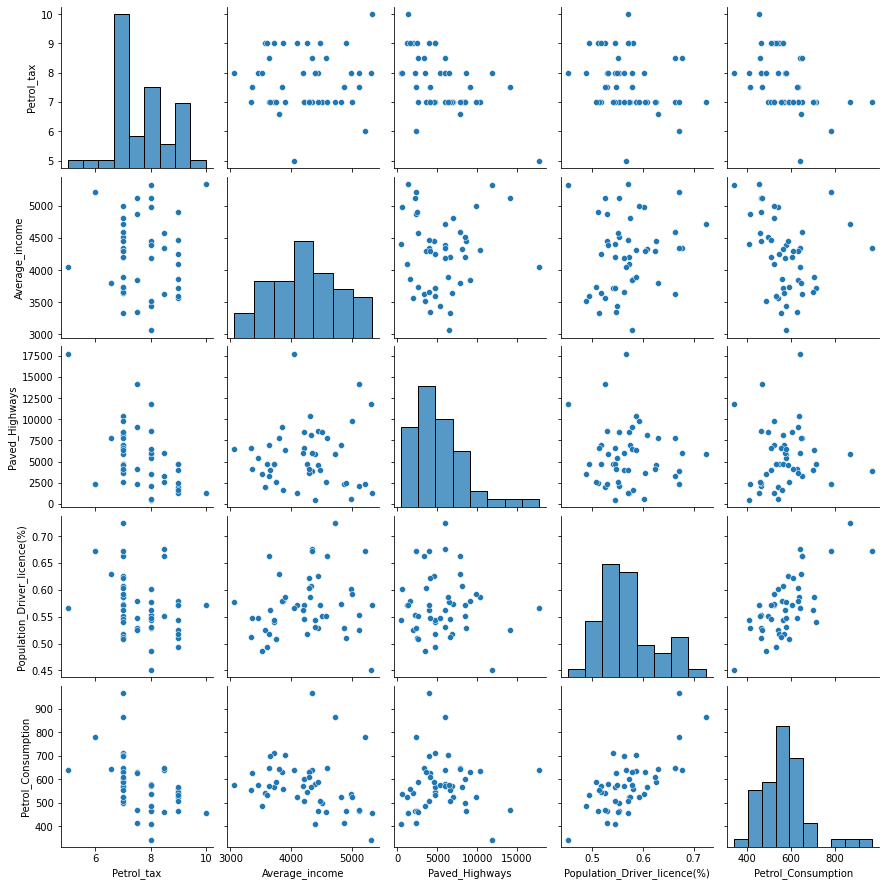

In [42]:
sns.pairplot(df) # Plot pairwise relationships in a dataset
plt.show() # Display all open figures

In [43]:
# We are going to use column names for creating an attribute set and label.
X=df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']]
y=df['Petrol_Consumption']

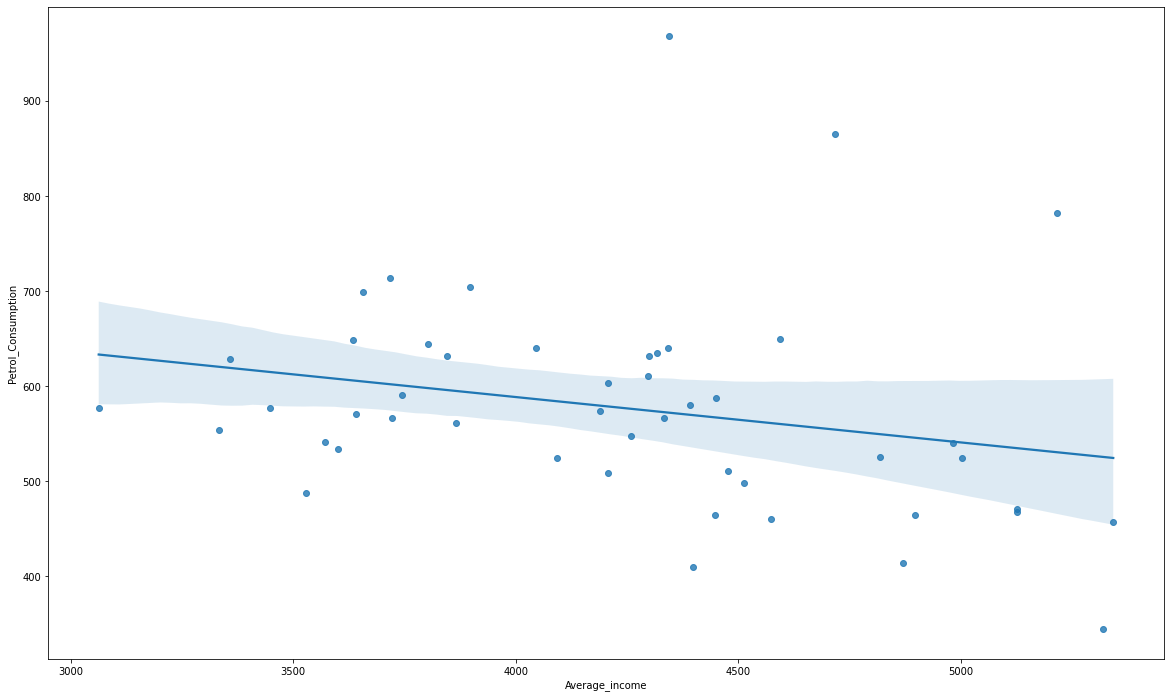

In [44]:
# Plot for Average_income VS Petrol_Consumption
plt.figure(figsize=(20, 12))
sns.regplot(x = 'Average_income', y = 'Petrol_Consumption', data = df)
plt.show()

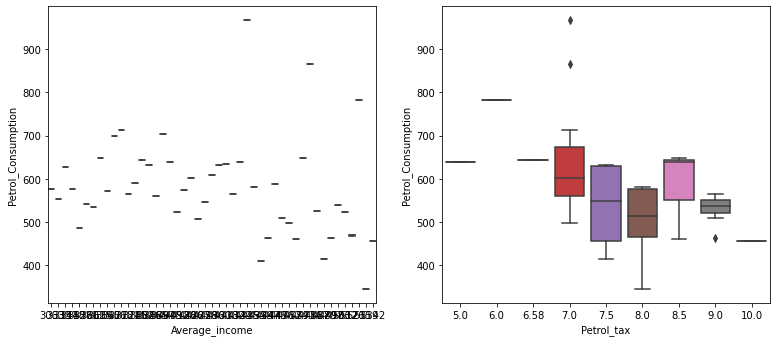

In [45]:
# Plot for Average_income VS Petrol_Consumption
# Plot for Petrol_tax VS Petrol_Consumption 
plt.figure(figsize=(20, 12))
plt.subplot(2,3,2)
sns.boxplot(x = 'Average_income', y = 'Petrol_Consumption', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'Petrol_tax', y = 'Petrol_Consumption', data = df)
plt.show()

In [57]:
# Dividing our data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [58]:
# Training the Algorithm
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# In case of multivariable linear regression, the regression model has to find the most optimal coefficients for all the attributes.
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [60]:
# The regression model has to find the most optimal intercept for all the attributes.
int_df = pd.DataFrame(reg.intercept_, X.columns, columns=['intercept'])
int_df

,intercept
Petrol_tax,425.599332
Average_income,425.599332
Paved_Highways,425.599332
Population_Driver_licence(%),425.599332


In [61]:
# Making Predictions
y_pred=reg.predict(X_test)

In [62]:
# Comparing the actual output values for X_test with the predicted values
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [63]:
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 56.8222474789647
Mean Squared Error: 4666.344787588362
Root Mean Squared Error: 68.31064915215168


In [64]:
# Predictions
y_pred=reg.predict([[9.0,3571,1976,0.525]])
y_pred

array([526.97067878])

In [65]:
#Petrol_Consumption = M1*speed+ M2*car_age+M3*experience+intercept
Petrol_Consumption = (-40.016660)*9.0	+(-0.065413)*3571+(-0.004741)*1976+1341.862121*0.525+425.599332
Petrol_Consumption

526.9689665249999

In [ ]:
# Link
# https://www.kaggle.com/maryamsharifi/multiple-linear-regression-for-beginners/notebook